In [1]:
import pickle
import re

demodir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/UKB/'

demo = pickle.load(open(f'{demodir}/demographics.pkl', 'rb'))

print(list(demo.keys()))

['f_22001_0_0', 'f_21003_3_0', 'f_21003_2_0', 'f_21000_0_0', 'CaAfCarDiff', 'CaIndDiff', 'CaChiDiff', 'f_21000_0_0_comb', 'longitudinal', '22438-0.0', '22828-0.0', '26201-0.0', '26202-0.0', '26203-0.0', '26204-0.0', '26205-0.0', '26206-0.0', '26207-0.0', '26208-0.0', '26209-0.0', '26210-0.0', '26211-0.0', '26212-0.0', '26213-0.0', '26214-0.0', '26215-0.0', '26216-0.0', '26217-0.0', '26218-0.0', '26219-0.0', '26220-0.0', '26221-0.0', '26222-0.0', '26223-0.0', '26224-0.0', '26225-0.0', '26226-0.0', '26227-0.0', '26228-0.0', '26229-0.0', '26231-0.0', '26232-0.0', '26233-0.0', '26234-0.0', '26235-0.0', '26236-0.0', '26237-0.0', '26238-0.0', '26239-0.0', '26240-0.0', '26241-0.0', '26242-0.0', '26243-0.0', '26244-0.0', '26245-0.0', '26246-0.0', '26247-0.0', '26248-0.0', '26249-0.0', '26250-0.0', '26251-0.0', '26252-0.0', '26253-0.0', '26254-0.0', '26255-0.0', '26256-0.0', '26257-0.0', '26258-0.0', '26259-0.0', '26260-0.0', '26261-0.0', '26262-0.0', '26263-0.0', '26264-0.0', '26265-0.0', '262

In [2]:
import pickle

field = 25753

basedir = '/run/media/anton/AntonData1/UKB_MRI_data_11092022/'

fc2 = pickle.load(open(f'{basedir}/{field}_2.pkl', 'rb'))
fc3 = pickle.load(open(f'{basedir}/{field}_3.pkl', 'rb'))

print(len(fc2), len(fc3))

40471 2896


In [2]:
import numpy as np

first = []
second = []

for sub in demo['f_21003_3_0']:
    if sub not in demo['f_21003_2_0']:
        continue
    try:
        p0 = np.load(f'{demodir}/fc/{sub}_task-20227-2_fc.npy')
        p1 = np.load(f'{demodir}/fc/{sub}_task-20227-3_fc.npy')
#         p0 = fc2[sub]
#         p1 = fc3[sub]
        first.append(p0)
        second.append(p1)
    except:
        continue
    
first = np.stack(first)
second = np.stack(second)

print(len(first), len(second))

2722 2722


In [3]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


In [4]:
bounds = [0, 30, 35, 49, 62, 120, 125, 156, 181, 199, 212, 221, 232, 236, 264]

/tmp/ipykernel_16146/990851388.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


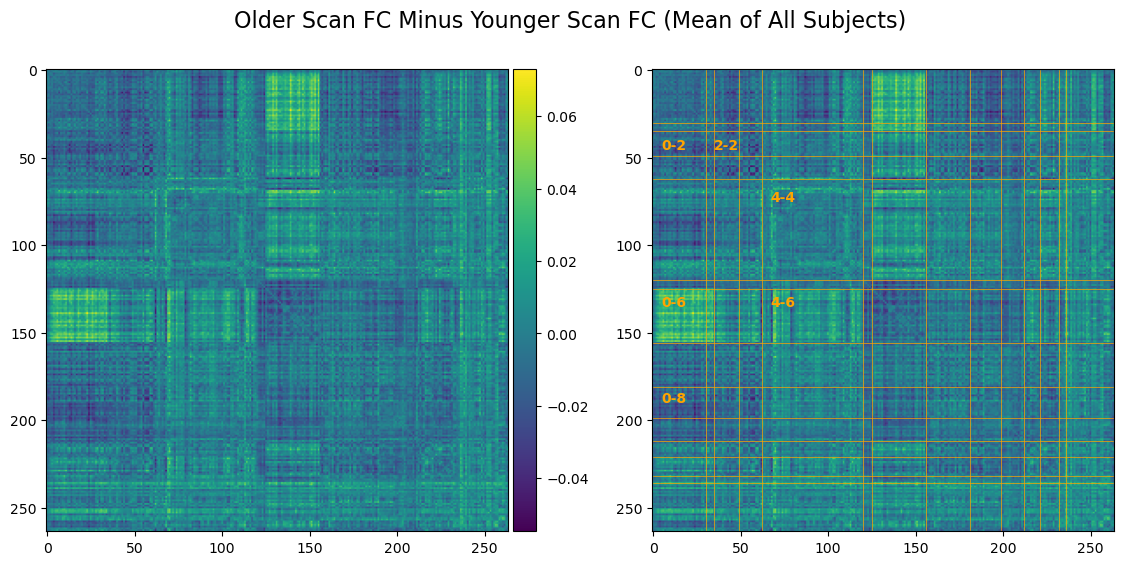

In [109]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# bounds = [0, 30, 35, 49, 62, 120, 125, 156, 181, 199, 212, 221, 232, 236, 264]
bounds = [0, 30, 35, 49, 62, 120, 125, 156, 181, 199, 212, 221, 232, 236, 264]

# Get difference between first and second

mu2 = np.mean(first, axis=0)
mu3 = np.mean(second, axis=0)

fig,ax = plt.subplots(1,2,figsize=(14,6))

im = ax[0].imshow(remap(vec2mat(mu3-mu2)))

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)

fig.colorbar(im, cax=cax, orientation='vertical')

ax[1].imshow(remap(vec2mat(mu3-mu2)))
for a in bounds[1:-1]:
    ax[1].plot([a,a],[0,263], color='orange', linewidth=0.5)
    ax[1].plot([0,263],[a,a], color='orange', linewidth=0.5)
    
ax[1].text(5,135,'0-6',fontweight='bold',color='orange')
ax[1].text(67,75,'4-4',fontweight='bold',color='orange')
ax[1].text(67,135,'4-6',fontweight='bold',color='orange')
ax[1].text(5,45,'0-2',fontweight='bold',color='orange')
ax[1].text(35,45,'2-2',fontweight='bold',color='orange')
ax[1].text(5,190,'0-8',fontweight='bold',color='orange')
    
fig.suptitle('Older Scan FC Minus Younger Scan FC (Mean of All Subjects)', fontsize=16)

fig.show()
fig.savefig('/home/anton/Documents/Tulane/Research/Work/UKB/long_fig3.pdf')

In [12]:
# Transform into matrices and
# Occlude all non-visual

def get_net(bounds, net1, net2):
    fo = []
    so = []
    
    s1 = np.arange(bounds[net1], bounds[net1+1])
    s2 = np.arange(bounds[net2], bounds[net2+1])

    for lst,full in zip([fo, so],[first, second]):
        for i,v in enumerate(full):
            m = remap(vec2mat(v))
            c = m[np.ix_(s1,s2)].flatten()
            lst.append(c)

    fo = np.stack(fo)
    so = np.stack(so)
    
    return fo, so

def get_net_whole(bounds, net1):
    fo = []
    so = []
    
    s1 = np.arange(bounds[net1], bounds[net1+1])
    s2 = np.arange(0, 264)

    for lst,full in zip([fo, so],[first, second]):
        for i,v in enumerate(full):
            m = remap(vec2mat(v))
            c = m[np.ix_(s1,s2)].flatten()
            lst.append(c)

    fo = np.stack(fo)
    so = np.stack(so)
    
    return fo, so

def get_net_avg(bounds, net1, net2):
    fo = []
    so = []
    
    s1 = np.arange(bounds[net1], bounds[net1+1])
    s2 = np.arange(bounds[net2], bounds[net2+1])

    for lst,full in zip([fo, so],[first, second]):
        for i,v in enumerate(full):
            m = remap(vec2mat(v))
            c = m[np.ix_(s1,s2)].flatten()
            c = np.mean(c, keepdims=True)
            lst.append(c)

    fo = np.stack(fo)
    so = np.stack(so)
    
    return fo, so

fo, so = get_net_avg(bounds, 0, 6)

print('Complete')
print(fo.shape, so.shape)
print(np.mean(fo), np.mean(so))
print(np.mean(so)/np.mean(fo))

Complete
(2722, 1) (2722, 1)
0.3907463321960789 0.41733390625346795
1.0680430547049824


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

N = 1300

for net1 in range(0,len(bounds)-1):
    for net2 in range(net1, len(bounds)-1):

        errs = []
        nullerrs = []

        fo, so = get_net(bounds, net1, net2)

        for _ in range(10):
            idcs = np.random.permutation(len(first))

            a = fo-so
            b = so-fo

            x = np.concatenate([a[idcs[:N]], b[idcs[N:N*2]]])
            y = np.concatenate([np.zeros(N), np.ones(N)])

            xtr, xt, ytr, yt = train_test_split(x, y, stratify=y, train_size=0.8)

            reg = LogisticRegression(max_iter=1000).fit(xtr, ytr)
            yhat = reg.predict(xt)
            err = np.mean(yhat == yt)
            nullerr = np.mean(yt)
            if nullerr < 0.5:
                nullerr = 1-nullerr
    #             print(err)
    #             print(nullerr)
            errs.append(err)
            nullerrs.append(nullerr)

        print(net1, net2, np.mean(errs), np.std(errs), (np.mean(errs)-np.mean(nullerrs))/fo.shape[1]*1000)
    #         print(np.mean(nullerrs), np.std(nullerrs))

0 0 0.6146153846153847 0.024297831495518583 0.1273504273504274
0 1 0.6107692307692308 0.015627884349161566 0.738461538461539
0 2 0.6321153846153847 0.01543381555941024 0.3145604395604399
0 3 0.6265384615384615 0.02095712727050045 0.3244575936883628
0 4 0.7015384615384614 0.022040844279837546 0.11582670203359853
0 5 0.5938461538461538 0.01832077748279162 0.6256410256410253


KeyboardInterrupt: 

/tmp/ipykernel_28458/28248881.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


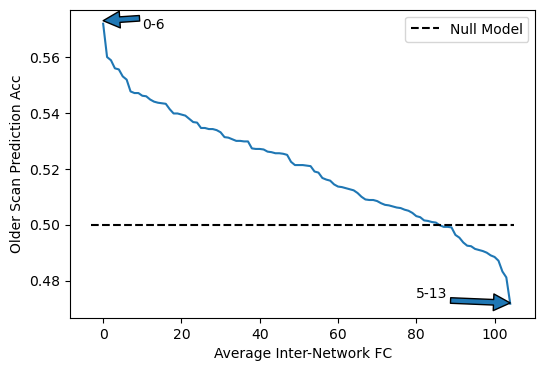

In [17]:
# Read networks file

import numpy as np
import matplotlib.pyplot as plt

fname = '/home/anton/Documents/Tulane/Research/Work/UKB/long_networks_avg.csv'

data = np.genfromtxt(fname, delimiter=' ')
idcs = np.argsort(data[:,2])[::-1]

fig,ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(data[idcs,2])
ax.plot([-3,105],[0.5,0.5],label='Null Model',linestyle='--',color='black')
# ax.set_ylim([0.45,0.6])
ax.legend()
ax.set_ylabel('Older Scan Prediction Acc')
ax.set_xlabel('Average Inter-Network FC')
ax.annotate('0-6',(0,.573),(10,0.57),arrowprops={})
ax.annotate('5-13',(104,.472),(80,0.474),arrowprops={})
fig.show()
fig.savefig('/home/anton/Documents/Tulane/Research/Work/UKB/long_fig4.pdf')

/tmp/ipykernel_16146/3591981463.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


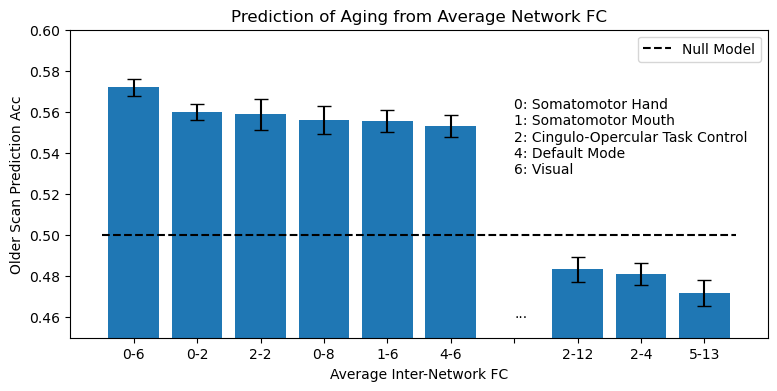

In [53]:
# Read networks file

fname = '/home/anton/Documents/Tulane/Research/Work/UKB/long_networks_avg.csv'

data = np.genfromtxt(fname, delimiter=' ')

idcs = np.argsort(data[:,2])[::-1]
labels = [f'{int(data[idcs[i],0])}-{int(data[idcs[i],1])}' for i in range(6)]
badlabels = [f'{int(data[idcs[-1-i],0])}-{int(data[idcs[-1-i],1])}' for i in range(3)]
errbars = data[idcs[:6],3].tolist() + [0] + data[idcs[-3:],3].tolist()
errbars = [e/np.sqrt(10) for e in errbars]

fig,ax = plt.subplots(1,1,figsize=(9,4))

ax.bar(labels + [''] + badlabels, data[idcs[:6],2].tolist()+[-1]+data[idcs[-3:],2].tolist(),
        yerr=errbars,capsize=5)
ax.plot([-0.5,9.5],[0.5,0.5],linestyle='--',color='black',label='Null Model')
ax.legend()
ax.set_ylim([0.45,0.6])
ax.text(6,0.53,'0: Somatomotor Hand\n1: Somatomotor Mouth\n2: Cingulo-Opercular Task Control\n4: Default Mode\n6: Visual')
ax.text(6,0.46,'...')
ax.set_ylabel('Older Scan Prediction Acc')
ax.set_xlabel('Average Inter-Network FC')
ax.set_title('Prediction of Aging from Average Network FC')
fig.show()
fig.savefig('/home/anton/Documents/Tulane/Research/Work/UKB/long_fig1.pdf')

[0.6245     0.58976923 0.60031868 0.60394505 0.6563956  0.56690659
 0.62662088 0.61896703 0.612      0.58429121 0.59985714 0.61075824
 0.55948352 0.61834615]


/tmp/ipykernel_16146/2520662285.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


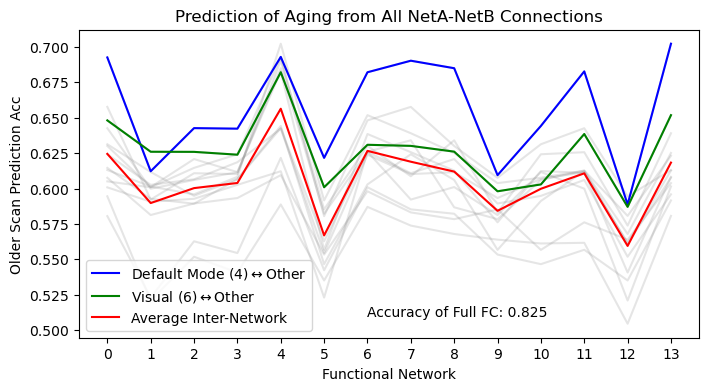

In [105]:
# Read networks file

fname = '/home/anton/Documents/Tulane/Research/Work/UKB/long_networks.csv'

net_mat = np.zeros((14,14))

data = np.genfromtxt(fname, delimiter=' ')
for row in data:
    r0 = int(row[0])
    r1 = int(row[1])
    net_mat[r0,r1] = row[2]
    net_mat[r1,r0] = row[2]
    
print(np.mean(net_mat, axis=1))

fig, ax = plt.subplots(1,1,figsize=(8,4))

for row in net_mat:
    ax.plot(row, color='gray', alpha=0.2)
    
ax.plot(net_mat[4], color='blue', label='Default Mode (4)$\\leftrightarrow$Other')
ax.plot(net_mat[6], color='green', label='Visual (6)$\\leftrightarrow$Other')
ax.set_xticks(np.arange(0,14))
    
ax.plot(np.mean(net_mat, axis=1), color='red', label='Average Inter-Network')
ax.legend(loc='lower left')
ax.set_title('Prediction of Aging from All NetA-NetB Connections')
ax.set_xlabel('Functional Network')
ax.set_ylabel('Older Scan Prediction Acc')
ax.text(6,0.51,'Accuracy of Full FC: 0.825')
    
fig.show()
fig.savefig('/home/anton/Documents/Tulane/Research/Work/UKB/long_fig2.pdf')

[0.26931643 0.51933775 0.54829846 0.19642622 0.94339507 0.31210231
 0.34459556 0.4355034  0.47418458 0.74135561 0.6936076  0.9253168
 0.30892642]


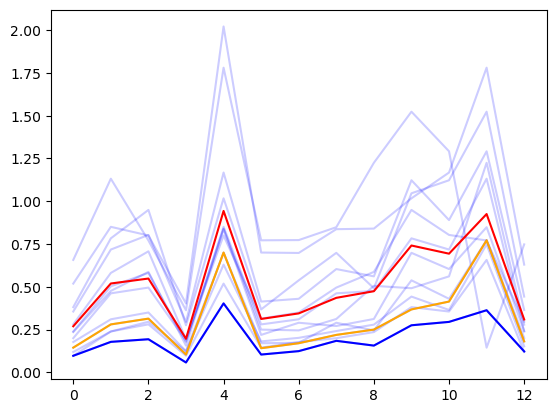

In [116]:
fname = '/home/anton/Documents/Tulane/Research/Work/UKB/long_networks2.csv'

net_mat = np.zeros((13,13))

data = np.genfromtxt(fname, delimiter=' ')
for row in data:
    r0 = int(row[0])
    r1 = int(row[1])
    net_mat[r0,r1] = row[4]
    net_mat[r1,r0] = row[4]
    
print(np.mean(net_mat, axis=1))

for row in net_mat:
    plt.plot(row, color='blue', alpha=0.2)
    
plt.plot(net_mat[3], color='blue')
plt.plot(net_mat[5], color='orange')
    
plt.plot(np.mean(net_mat, axis=1), color='red')
    
plt.show()